<a href="https://colab.research.google.com/github/christina3099/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import tensorflow.keras.datasets

In [4]:
#Loading the dataset from Keras
(x_train, y_train),(x_test,y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
import matplotlib.pyplot as plt

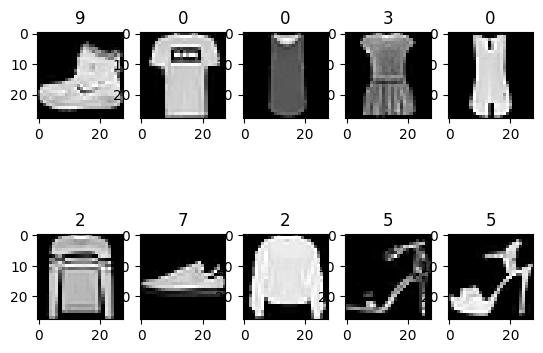

In [21]:
#Visualising sample images from the training dataset
for index, (image,label) in enumerate(zip(x_train[:10],y_train[:10])):
    plt.subplot(2,5,index+1)
    plt.title(label)
    plt.imshow(image,cmap="gray")

In [22]:
#Normalising the images for better convergence of weights and faster learning
x_train = x_train/255
x_test = x_test/255

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [75]:
model = Sequential()

In [76]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
dropout = tensorflow.keras.layers.Dropout(0.2)
model.add(dropout)
model.add(Dense(64,activation="relu"))
model.add(dropout)
model.add(Dense(10,activation="softmax"))

In [77]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [79]:
history = model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7138 - loss: 0.8081 - val_accuracy: 0.8470 - val_loss: 0.4248
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8383 - loss: 0.4499 - val_accuracy: 0.8543 - val_loss: 0.4008
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8558 - loss: 0.4040 - val_accuracy: 0.8680 - val_loss: 0.3646
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8613 - loss: 0.3755 - val_accuracy: 0.8742 - val_loss: 0.3463
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8690 - loss: 0.3584 - val_accuracy: 0.8677 - val_loss: 0.3620
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8708 - loss: 0.3426 - val_accuracy: 0.8751 - val_loss: 0.3404
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8767 - loss: 0.3316 - val_accuracy: 0.8695 - val_loss: 0.3499
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8782 - loss: 0.3240 

In [80]:

y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [81]:
y_prob

array([[7.5809629e-11, 5.4677832e-11, 5.6870884e-12, ..., 3.5420568e-03,
        6.7689861e-11, 9.9640119e-01],
       [1.0855572e-08, 4.7529359e-16, 9.9982214e-01, ..., 4.5611685e-24,
        1.1276084e-16, 2.9469147e-22],
       [3.1652860e-17, 9.9999994e-01, 1.6221354e-19, ..., 7.5216980e-37,
        4.1408536e-23, 3.8958052e-32],
       ...,
       [1.1508691e-09, 1.8071429e-15, 4.2877589e-12, ..., 2.2837121e-14,
        9.9999994e-01, 1.5046627e-16],
       [1.1846562e-15, 9.9999994e-01, 1.3155636e-15, ..., 4.0209136e-24,
        2.8747239e-17, 2.6417043e-22],
       [1.7599790e-08, 6.9455287e-13, 2.7988564e-08, ..., 5.6067271e-05,
        7.9014450e-07, 3.7898697e-06]], dtype=float32)

In [82]:
y_pred = tensorflow.argmax(y_prob,axis=1)

In [83]:
from sklearn.metrics import accuracy_score
testing_accuracy = accuracy_score(y_test,y_pred)
testing_accuracy

0.8788

In [84]:

import matplotlib.pyplot as plt

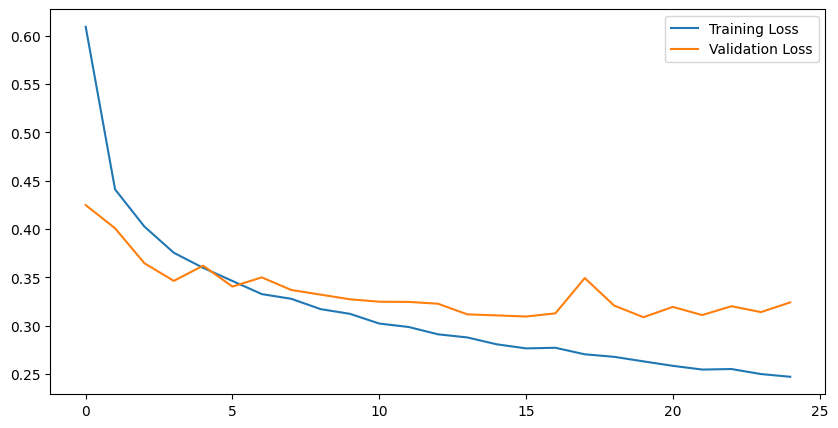

In [85]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

#Building the model
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(128, activation ="relu", kernel_regularizer=l2(0.001))) # Added L2 regularization
model1.add(Dropout(0.3))
model1.add(Dense(32, activation ="relu", kernel_regularizer=l2(0.001))) # Added L2 regularization
model1.add(Dropout(0.3))
model1.add(Dense(32, activation ="relu", kernel_regularizer=l2(0.001))) # Added L2 regularization
model1.add(Dropout(0.3))
model1.add(Dense(10, activation ="softmax"))

In [87]:
model1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,994 (414.04 KB)

 Trainable params: 105,994 (414.04 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [89]:
history = model1.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5778 - loss: 1.3912 - val_accuracy: 0.8160 - val_loss: 0.6906
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7712 - loss: 0.8163 - val_accuracy: 0.8102 - val_loss: 0.6745
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7942 - loss: 0.7440 - val_accuracy: 0.8497 - val_loss: 0.5718
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8093 - loss: 0.6992 - val_accuracy: 0.8447 - val_loss: 0.5743
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8113 - loss: 0.6942 - val_accuracy: 0.8503 - val_loss: 0.5542
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8135 - loss: 0.6842 - val_accuracy: 0.8500 - val_loss: 0.5540
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8179 - loss: 0.6745 - val_accuracy: 0.8504 - val_loss: 0.5512
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8155 - loss: 0.672

In [90]:
y_prob = model1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [91]:
y_pred = tensorflow.argmax(y_prob,axis=1)

In [92]:
testing_accuracy = accuracy_score(y_test,y_pred)
testing_accuracy

0.8411

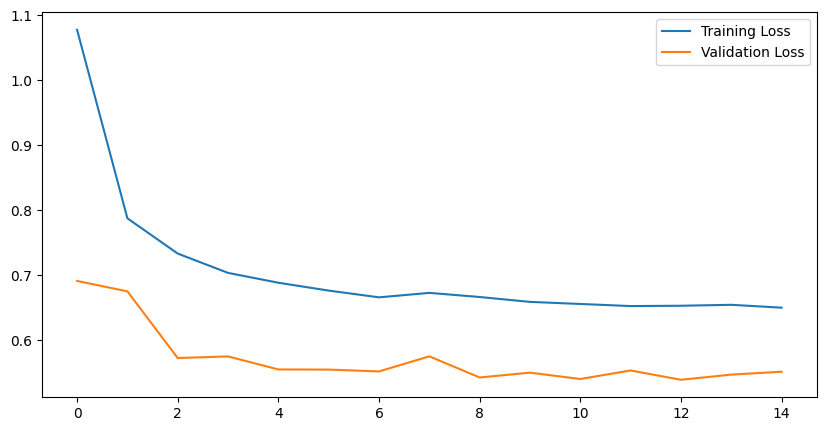

In [93]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()

In [94]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(128, activation ="relu", kernel_regularizer=l2(0.001))) # Added L2 regularization
model2.add(Dropout(0.3))
model2.add(Dense(64, activation ="relu", kernel_regularizer=l2(0.001))) # Added L2 regularization
model2.add(Dropout(0.2))
model2.add(Dense(32, activation ="relu", kernel_regularizer=l2(0.001))) # Added L2 regularization
model2.add(Dropout(0.3))
model2.add(Dense(10, activation ="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [97]:
history = model2.fit(x_train,y_train,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6040 - loss: 1.3473 - val_accuracy: 0.8102 - val_loss: 0.6755
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7993 - loss: 0.7490 - val_accuracy: 0.8401 - val_loss: 0.6142
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8162 - loss: 0.6800 - val_accuracy: 0.8375 - val_loss: 0.5806
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8166 - loss: 0.6585 - val_accuracy: 0.8436 - val_loss: 0.5583
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8238 - loss: 0.6427 - val_accuracy: 0.8439 - val_loss: 0.5676
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8290 - loss: 0.6269 - val_accuracy: 0.8486 - val_loss: 0.5411
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8315 - loss: 0.6196 - val_accuracy: 0.8499 - val_loss: 0.5397
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8294 - loss: 0.6

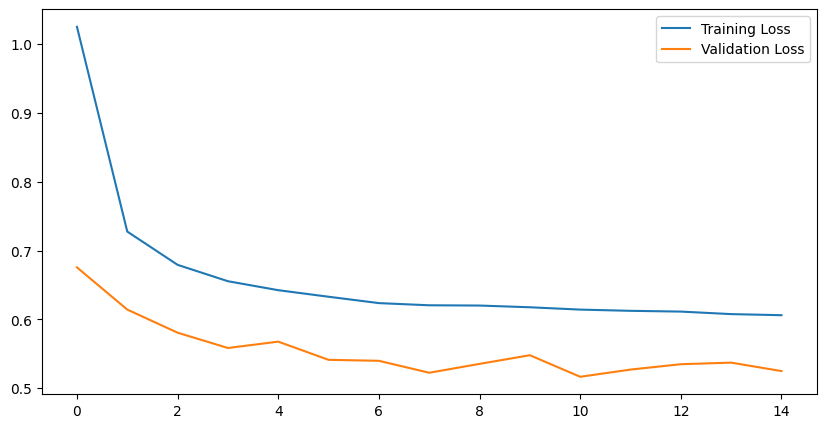

In [98]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend()